In [1]:
#  Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  Step 2: Load the Dataset
df = pd.read_csv("Titanic-Dataset.csv")


print("First 5 rows:")
display(df.head())


















First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
!pip install scikit-learn



In [3]:

#  Step 3: Basic Information About the Dataset
print("Dataset Info:")
df.info()

print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          68

In [4]:


#  Step 4: Statistical Summary of Numerical Columns
print("Statistical Summary of 'Age':")
print(df['Age'].describe())


Statistical Summary of 'Age':
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [5]:
#  Step 5: Handle Missing Values

# 5.1: Fill missing Age values using Median (robust to outliers)
df['Age'] = df['Age'].fillna(df['Age'].median())

# 5.2: Fill missing Embarked values with Mode (most frequent port)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 5.3: Drop the Cabin column due to high missing values (~77%) — safely
df.drop(columns=['Cabin'], inplace=True, errors='ignore')



In [6]:

#  Step 6: Verify That Missing Values Are Handled
print("Missing Values After Cleaning:")
print(df.isnull().sum())

Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [7]:


#  Step 7: Convert Categorical Columns to Numeric

# Convert 'Sex' using Label Encoding (Male = 0, Female = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' (drop first to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


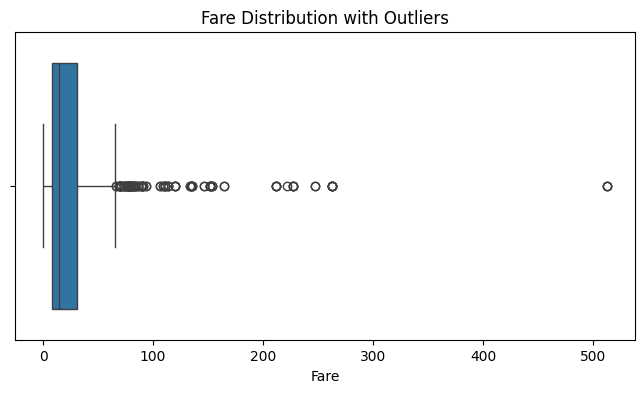

In [8]:



#  Step 8: Visualize and Handle Outliers

# Visualize outliers in Fare
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution with Outliers")
plt.show()

# Optional: Remove extreme outliers from Fare (above 95th percentile)
fare_threshold = df['Fare'].quantile(0.95)
df = df[df['Fare'] < fare_threshold]


In [9]:

# 📏 Step 9: Normalize Numerical Columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [10]:



#  Step 10: Save Cleaned Dataset
df.to_csv("Cleaned_Titanic_Dataset.csv", index=False)
print(" Cleaned dataset saved as 'Cleaned_Titanic_Dataset.csv'")


✅ Cleaned dataset saved as 'Cleaned_Titanic_Dataset.csv'


In [11]:

print("Cleaned Data Preview:")
display(df.head())


Cleaned Data Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.558841,1,0,A/5 21171,-0.714895,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.676528,1,0,PC 17599,2.149158,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.249999,0,0,STON/O2. 3101282,-0.684704,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.444896,1,0,113803,1.335864,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.444896,0,0,373450,-0.679113,False,True
